**Film Franchise Box Office Predictor**

Over the past decades, we see that film franchises has been around due to critics and audiences response for more sequels. For more sequels, it would mean that the box office needs to show profit for studios to greenlit more sequels based on how the film is received.

We are going to look into Box Office Revenue for film franchises only in U.S. and Canada based on the dataset I created.

The dataset, **Film Franchise Box Office Revenue (US and Canada)** includes:
* **Franchise** - Film Title for Franchise
* **Total** - Total revenue for film franchise
* **Releases** - The number of releases where the franchise includes re-releases and sequels
* **Top Release** - The film in the film franchise that made the most profit
* **Domestic Lifetime Gross** - How much the film has made in the franchise
* **Budget** - How much did the film cost?
* **Studio** - The film that was produced and distributed from?
* **Rating** - The classification rating for the film
* **Average Critic Score** - The number of critics who like the film
* **Average Audience Score** - The number of audiences who like the film
* **Main Actor** - The lead actor who stars in the film

In [5]:
#Importing our necessary basic packages for this notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#Defining out variable for the dataset
film_franchise_df = pd.read_csv("C://Users//kebun//Downloads//Film Franchise Box Office Revenue (US and Canda).csv")

In [7]:
#Information on our dataset
film_franchise_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Franchise                312 non-null    object 
 1   Total                    312 non-null    object 
 2   Releases                 312 non-null    int64  
 3   Top Release              312 non-null    object 
 4   Domestic Lifetime Gross  312 non-null    object 
 5   Budget                   310 non-null    object 
 6   Studio                   312 non-null    object 
 7   Rating                   312 non-null    object 
 8   Runtime                  312 non-null    int64  
 9   Average Critic Score     312 non-null    int64  
 10  Average Audience Score   312 non-null    float64
 11  Main Actor               312 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 29.4+ KB


**Changing Some Our Columns as a Numerical Instead of an an Object**

We need to change some our columns in order to make them numerical types, which includes **Total**, **Domestic Lifetime Gross**, and **Budget**

In [10]:
#We are using this method to convert all values to strings, remove commas, converting it to numeric all at once
film_franchise_df['Total'] = pd.to_numeric(film_franchise_df['Total'].astype(str).str.replace(',', ''), errors='coerce')
film_franchise_df['Domestic Lifetime Gross'] = pd.to_numeric(film_franchise_df['Domestic Lifetime Gross'].astype(str).str.replace(',', ''), errors='coerce', downcast='integer')
film_franchise_df['Budget'] = pd.to_numeric(film_franchise_df['Budget'].astype(str).str.replace(',', ''), errors='coerce')

In [11]:
#checking our dtypes
film_franchise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Franchise                312 non-null    object 
 1   Total                    312 non-null    int64  
 2   Releases                 312 non-null    int64  
 3   Top Release              312 non-null    object 
 4   Domestic Lifetime Gross  312 non-null    int32  
 5   Budget                   310 non-null    float64
 6   Studio                   312 non-null    object 
 7   Rating                   312 non-null    object 
 8   Runtime                  312 non-null    int64  
 9   Average Critic Score     312 non-null    int64  
 10  Average Audience Score   312 non-null    float64
 11  Main Actor               312 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 28.2+ KB


**Checking If Any Columns Have Null Values**

Based on our dataset, we see that only **Budget** has null values, so we need to ensure that that column does not have any null values

In [14]:
# Fill the column with the median budget
film_franchise_df['Budget'] = film_franchise_df['Budget'].fillna(film_franchise_df['Budget'].median())

In [15]:
#Checking our information to ensure there are no null values
film_franchise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Franchise                312 non-null    object 
 1   Total                    312 non-null    int64  
 2   Releases                 312 non-null    int64  
 3   Top Release              312 non-null    object 
 4   Domestic Lifetime Gross  312 non-null    int32  
 5   Budget                   312 non-null    float64
 6   Studio                   312 non-null    object 
 7   Rating                   312 non-null    object 
 8   Runtime                  312 non-null    int64  
 9   Average Critic Score     312 non-null    int64  
 10  Average Audience Score   312 non-null    float64
 11  Main Actor               312 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 28.2+ KB


**Data Visualization**

Quesitons that we want to ask:
* Which Main Actor has been in the different film franchises?
* Which Studio has the highest count depending domestic Lifetime Gross?
* Which Film has the highest average audience score?
* How many films with a budget that is greater than 200 million dollars made high box office grosses that is $500 million dollars or more?

Top Film by Audience Score:
The Godfather (Score: 9.2)
High-Budget Blockbusters(>$200000000 budget and $500000000+ gross): 13


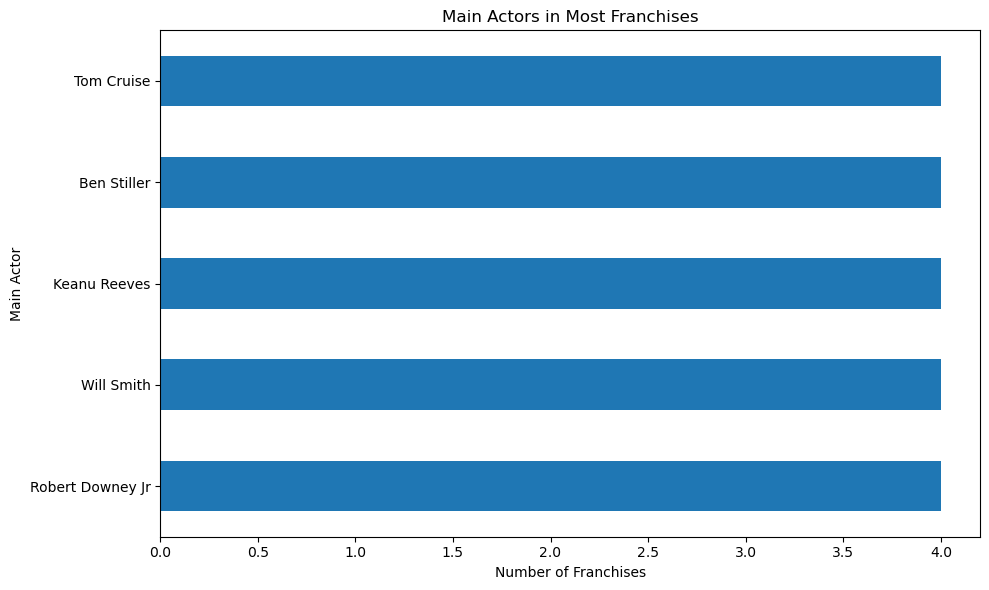

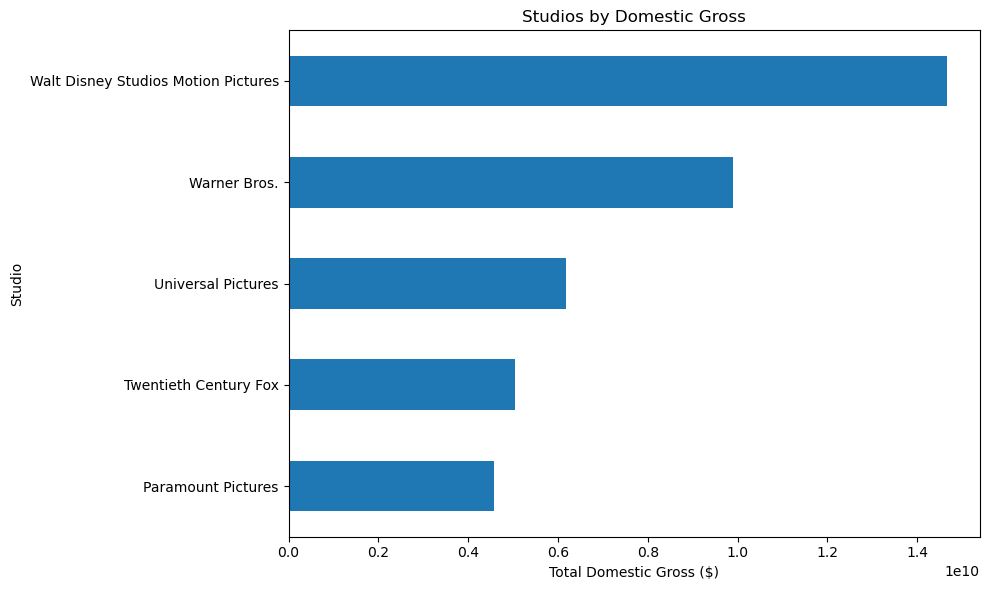

In [18]:
#Main Actor in multiple franchises
actor_franchise = film_franchise_df.groupby('Main Actor')['Franchise'].nunique().sort_values(ascending =False)
top_actors = actor_franchise.head(5)

#Studio with the highest domestic lifetime gross
studio_gross = film_franchise_df.groupby('Studio')['Domestic Lifetime Gross'].sum().sort_values(ascending = False)
top_studio = studio_gross.head(5)

#Film title with the highest audience score
top_film = film_franchise_df.loc[film_franchise_df['Average Audience Score'].idxmax(), ['Top Release', 'Average Audience Score']]

#Counting of high budget films that that grossed high
high_budget_count = film_franchise_df[(film_franchise_df['Budget'] > 200000000) & (film_franchise_df['Total'] >= 500000000)].shape[0]

#Printing answers 
print(f"Top Film by Audience Score:\n{top_film['Top Release']} (Score: {top_film['Average Audience Score']})")
print(f"High-Budget Blockbusters(>$200000000 budget and $500000000+ gross): {high_budget_count}")

#Visualize top actors by film franchise
top_actors.plot(kind='barh', title = "Main Actors in Most Franchises", figsize=(10,6))
plt.xlabel("Number of Franchises")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#Visualize top studios by domestic gross
top_studio.plot(kind='barh', title = "Studios by Domestic Gross", figsize=(10,6))
plt.xlabel("Total Domestic Gross ($)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Based on our graphs and answers for the questions: 
1. Which Main Actor has been in different franchises?
   * Tom Cruise, Ben Stiller, Keanu Reeves, and Will Smith
2. Which Studio has the highest count depending domestic Lifetime Gross?
   * Walt Disney Motion Pictures, Warner Bros, Universal Pictures, Twentieth Century Fox, and Paramount Pictures
3. Which Film has the highest average audience score?
   * The Godfather with a score of 9.2
4. How many films with a budget that is greater than 200 million dollars made high box office grosses that is 500 million dollars or more?
   * 13 films had grossed 500 million dollars or more that had a budget greater than 200 million dollars

**Predictive Question**


Given that we have columns such as budget, studio, main actor, rating, and audience/critic scores of the film, can we predict the total domestic box office gross?

**Label Encoding on Our Categorial Columns**

To answer our predictive question, we need to label encode our categorical columns needed for this predictive model such as **Main Actor**, **Studio**, **Rating**

In [23]:
film_franchise_df.columns = film_franchise_df.columns.str.strip()

In [24]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

#1. One-hot encode 'Studio'
film_franchise_df = pd.get_dummies(film_franchise_df, columns=['Studio'], prefix='Studio')
studio_columns = [col for col in film_franchise_df.columns if col.startswith('Studio_')]

#2. Label Encode 'Rating'
label_encoder = LabelEncoder()
film_franchise_df['Rating_Encoded'] = label_encoder.fit_transform(film_franchise_df['Rating'])

#3. Frequency encoding for Main Actor
actors_counts = film_franchise_df['Main Actor'].value_counts()
film_franchise_df['Actor_Frequency'] = film_franchise_df['Main Actor'].map(actors_counts)

In [25]:
#Check information on the current dataset
film_franchise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 63 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Franchise                                     312 non-null    object 
 1   Total                                         312 non-null    int64  
 2   Releases                                      312 non-null    int64  
 3   Top Release                                   312 non-null    object 
 4   Domestic Lifetime Gross                       312 non-null    int32  
 5   Budget                                        312 non-null    float64
 6   Rating                                        312 non-null    object 
 7   Runtime                                       312 non-null    int64  
 8   Average Critic Score                          312 non-null    int64  
 9   Average Audience Score                        312 non-null    flo

**Split The Data**

Seperate our data into:
* **Features (x)**: inputs used to make the prediction
* **Target(y)**: what you want to predict (Domestic Lifetime Gross)

In [27]:
from sklearn.model_selection import train_test_split

#Selecting our features
X = film_franchise_df[[
    'Budget',
    'Average Audience Score',
    'Rating_Encoded',
    'Actor_Frequency'
] + [col for col in film_franchise_df.columns if col.startswith("Studio_")]]

y = film_franchise_df['Domestic Lifetime Gross']

#Splitting into training and test sets with (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Train the Regression Model**

In [29]:
#We'll try with Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred_rf = model.predict(X_test)

# Evaluate
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"MAE: ${rf_mae:,.0f}")
print(f"R² Score: {rf_r2:.3f}")

MAE: $60,512,096
R² Score: 0.767


In [30]:
#Random Forest with Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Setup grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='r2', n_jobs=-1, verbose=1)

# Fit
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test)

# Evaluate
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred_rf_tuned)
r2 = r2_score(y_test, y_pred_rf_tuned)

print(f"Best Params: {grid_search.best_params_}")
print(f"MAE: ${mae:,.0f}")
print(f"R² Score: {r2:.3f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
MAE: $61,840,451
R² Score: 0.770


In [31]:
#Gradient Boosting
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_r2 = r2_score(y_test, xgb_preds)

print(f"MAE: ${xgb_mae:,.0f}")
print(f"R² Score: {xgb_r2:.3f}")

MAE: $68,954,362
R² Score: 0.629


In [32]:
#Gradient Boosting with Hyperparameter Tuning
from sklearn.ensemble import GradientBoostingRegressor
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize model
gbr = GradientBoostingRegressor(random_state=42)

# Setup GridSearchCV
grid_search_gbr = GridSearchCV(estimator=gbr, param_grid=param_grid,
                                scoring='r2', cv=5, n_jobs=-1, verbose=1)

# Fit model
grid_search_gbr.fit(X_train, y_train)

# Best model
best_gbr = grid_search_gbr.best_estimator_
y_pred_gbr_tuned = best_gbr.predict(X_test)

# Evaluate
mae_gbr = mean_absolute_error(y_test, y_pred_gbr_tuned)
r2_gbr = r2_score(y_test, y_pred_gbr_tuned)

print(f"MAE: ${mae_gbr:,.0f}")
print(f"R² Score: {r2_gbr:.3f}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
MAE: $60,217,217
R² Score: 0.752


In [33]:
#Ridge Regression
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_preds = ridge_model.predict(X_test)

ridge_mae = mean_absolute_error(y_test, ridge_preds)
ridge_r2 = r2_score(y_test, ridge_preds)

print(f"MAE: ${ridge_mae:,.0f}")
print(f"R² Score: {ridge_r2:.3f}")

MAE: $69,737,948
R² Score: 0.662


C:\Users\kebun\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.28834e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [34]:
#Ridge Regression with Hyperparameter Tuning
from sklearn.linear_model import Ridge

# Define parameter grid
param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

# Grid search
grid_search_ridge = GridSearchCV(Ridge(), param_grid=param_grid_ridge,
                                 scoring='r2', cv=5, n_jobs=-1, verbose=1)
grid_search_ridge.fit(X_train, y_train)

# Best model
best_ridge = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)

# Evaluation
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"MAE: ${mae_ridge:,.0f}")
print(f"R² Score: {r2_ridge:.3f}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
MAE: $64,381,077
R² Score: 0.703


C:\Users\kebun\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.06012e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [35]:
#Support Vector Regression
from sklearn.svm import SVR

svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_preds = svr_model.predict(X_test)

svr_mae = mean_absolute_error(y_test, svr_preds)
svr_r2 = r2_score(y_test, svr_preds)

print(f"MAE: ${svr_mae:,.0f}")
print(f"R² Score: {svr_r2:.3f}")

MAE: $110,597,758
R² Score: -0.034


In [36]:
#SVR with Hyperparameter Tuning
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Define parameter grid
param_grid_svr = {
    'svr__C': [0.1, 1, 10],
    'svr__epsilon': [0.1, 0.5, 1],
    'svr__kernel': ['rbf', 'linear']
}

# Create a pipeline with scaling
svr_pipeline = make_pipeline(StandardScaler(), SVR())

# Grid search
grid_search_svr = GridSearchCV(svr_pipeline, param_grid=param_grid_svr,
                               scoring='r2', cv=5, n_jobs=-1, verbose=1)
grid_search_svr.fit(X_train, y_train)

# Best model
best_svr = grid_search_svr.best_estimator_
y_pred_svr = best_svr.predict(X_test)

# Evaluation
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"MAE: ${mae_svr:,.0f}")
print(f"R² Score: {r2_svr:.3f}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
MAE: $110,595,657
R² Score: -0.034


**Graphs to Show Predicted vs. Actual**

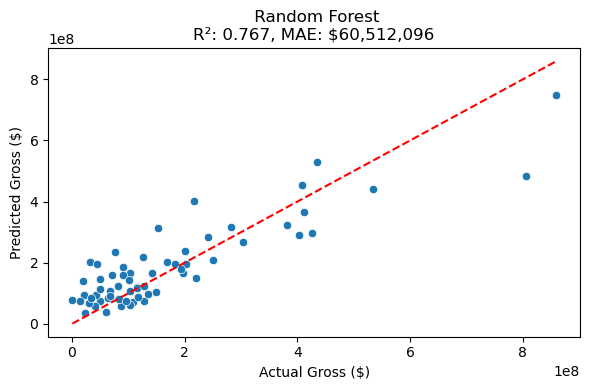

In [38]:
#Random Forest
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title(f" Random Forest\nR²: {rf_r2:.3f}, MAE: ${rf_mae:,.0f}")
plt.xlabel("Actual Gross ($)")
plt.ylabel("Predicted Gross ($)")
plt.tight_layout()
plt.show()

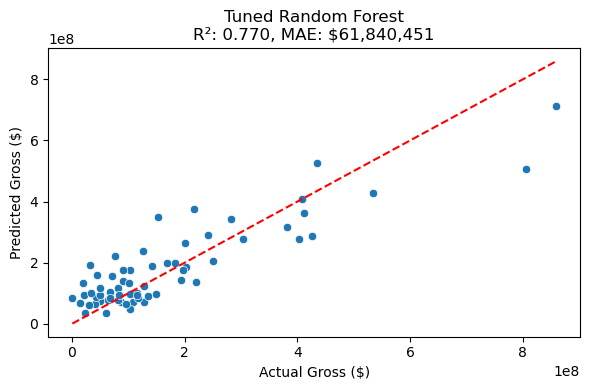

In [39]:
#Random Forest with Hyperparameter Tuning
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred_rf_tuned)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title(f"Tuned Random Forest\nR²: {r2:.3f}, MAE: ${mae:,.0f}")
plt.xlabel("Actual Gross ($)")
plt.ylabel("Predicted Gross ($)")
plt.tight_layout()
plt.show()

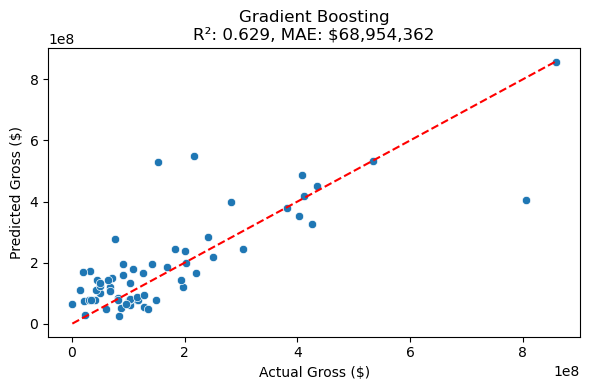

In [40]:
#Gradient Boosting
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=xgb_preds)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title(f"Gradient Boosting\nR²: {xgb_r2:.3f}, MAE: ${xgb_mae:,.0f}")
plt.xlabel("Actual Gross ($)")
plt.ylabel("Predicted Gross ($)")
plt.tight_layout()
plt.show()

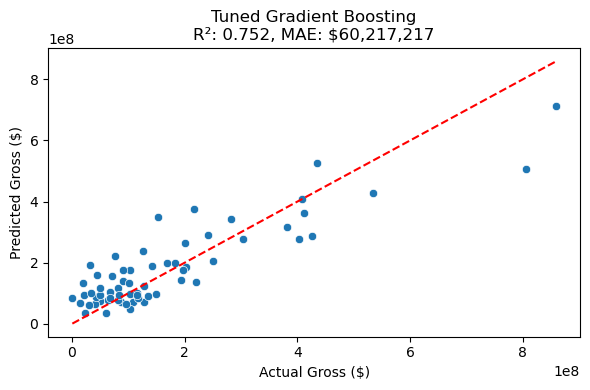

In [41]:
#Gradient Boosting with Hyperparameter Tuning
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred_rf_tuned)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title(f"Tuned Gradient Boosting\nR²: {r2_gbr:.3f}, MAE: ${mae_gbr:,.0f}")
plt.xlabel("Actual Gross ($)")
plt.ylabel("Predicted Gross ($)")
plt.tight_layout()
plt.show()

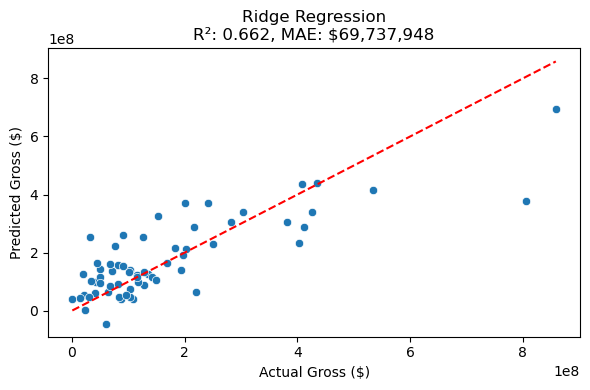

In [42]:
#Ridge Regression
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=ridge_preds)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title(f"Ridge Regression\nR²: {ridge_r2:.3f}, MAE: ${ridge_mae:,.0f}")
plt.xlabel("Actual Gross ($)")
plt.ylabel("Predicted Gross ($)")
plt.tight_layout()
plt.show()

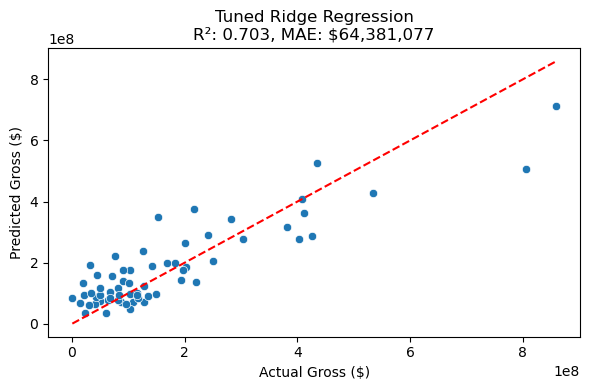

In [43]:
#Random Forest with Hyperparameter Tuning
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred_rf_tuned)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title(f"Tuned Ridge Regression\nR²: {r2_ridge:.3f}, MAE: ${mae_ridge:,.0f}")
plt.xlabel("Actual Gross ($)")
plt.ylabel("Predicted Gross ($)")
plt.tight_layout()
plt.show()

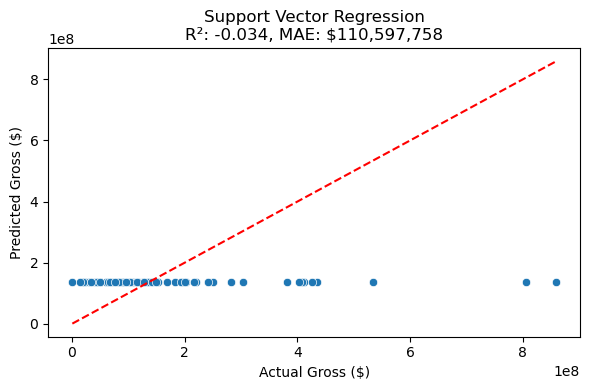

In [44]:
#Support Vector Regression
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=svr_preds)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title(f"Support Vector Regression\nR²: {svr_r2:.3f}, MAE: ${svr_mae:,.0f}")
plt.xlabel("Actual Gross ($)")
plt.ylabel("Predicted Gross ($)")
plt.tight_layout()
plt.show()

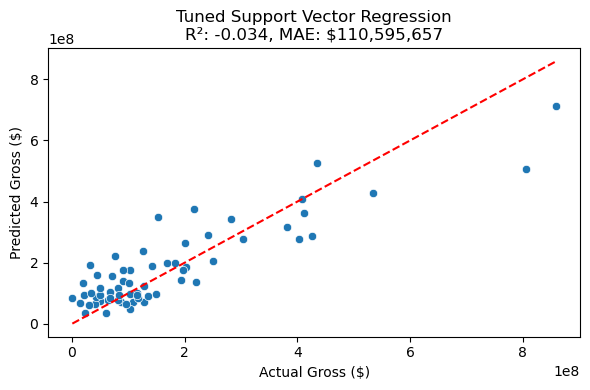

In [45]:
#SVR with Hyperparameter Tuning
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred_rf_tuned)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title(f"Tuned Support Vector Regression\nR²: {r2_svr:.3f}, MAE: ${mae_svr:,.0f}")
plt.xlabel("Actual Gross ($)")
plt.ylabel("Predicted Gross ($)")
plt.tight_layout()
plt.show()

After seeing graphs between Predicted and Actual on the model algorithms, and the R^2 and MSE, we can use **Random Forest with Hyperparameter Tuning** since it gave us the highest compared to others with an **accuracy of 77%**

**Testing New Data with our Model Algorithm**

In [48]:
# 1. Create base features for new_film
new_film = {
    'Budget': 210_000_000,
    'Average Audience Score': 8.3,
    'Rating_Encoded': 3,           # PG-13
    'Actor_Frequency': 5           # Number of times actor appeared in different franchises
}

# 2. Auto-fill all missing columns from X_train with 0
for col in X_train.columns:
    if col not in new_film:
        new_film[col] = 0

# 3. Convert to DataFrame
new_film_df = pd.DataFrame([new_film])

# 4. Predict
predicted_gross = best_rf.predict(new_film_df)[0]
print(f"Predicted Gross: ${predicted_gross:,.0f}")  

Predicted Gross: $519,863,777


**Conclusion**

For this project, we developed a machine learning pipline to predict box office revenue for films using features such as **budget**, **studio**, **main actor frequency**, **MPAA rating**, and **audience/critic score**

We began by:
* Cleaning a preprocessing a dataset of film franchises
* Encoding categorical varaibles
* Engineering features like **Actor_Frequency** to represent star power
* Splitting the data into training and test sets

We then trained and compared several regression models includes:
* Random Forest Regressor
* Gradient Boosting Regressor
* Ridge Regression
* Support Vector Regression

We also performed hyperparameter tuning using **GridSearchCV** to improve performance on the regression models, which gave us a better accuracy for Random Forest and Gradient Boosting model

We evaluated the models using:
* Mean Absolute Error (MSE)
* R^2 Score
* Graphs show difference between Acutal and Predicted

We finally tested out by creating a new film and predict what the domestic gross overall for the new film would be

**Next Steps**
* Add genre information to create even better predictions possibly
* Train on data that focuses on individual films rather than films that connect to film franchises